# Python for Data Science 2022
_Author: Satchit Chatterji (satchit.chatterji@gmail.com)_
## Case study 1 *extended*: What stock should I buy?
> Today's question: **Which of the given stocks is a better investment?**

This notebook is an extention of the notebook we went through in Lecture 1, but with some additional data exploration and hypothesis testing.

#### Learning outcomes:
- Refresh Python knowledge (modules, datatypes, math, loops, functions...)
- Python notebook/Google Colab practice
- Using modules
- Basic usage: Pandas (DataFrames, plotting)
- Basic usage: Matplotlib (plotting)
- Basic usage: statistics and inference
- *New!* Plotting histograms, lineplots, barplots
- *New!* Hypothesis testing
- *New!* Fitting Gaussian distributions


---
# Download and install packages
When programming or doing data science, we almost never write code from scratch -- we use packages written by other developers and we use them in our projects. In this case, we use `yfinance`, a package that allows us to easily download finance information from Yahoo Finance (the same information that Apple uses to show stock information on your iPhone). 

Generally, we use pip (['package installer for python'](www.pypi.org/project/pip)) to install packages for Python (i.e. borrow reusable code from other authors). This is done in the code cell below. Note that if you're not using Google Colab, you may need to run `pip install pandas matplotlib` to install pandas and matplotlib as well, which is used later in this notebook.

If this installation is successful, it will say so at the very bottom of the output (`"Successfully installed ..."`). If you already have this package, you may not see this.

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 507 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


### Load modules into our project
Here, we load in packages/modules that we may want to use for our current project. `yfinance` for downloading financial information, `matplotlib` for plotting and `pandas` for manipulating data. 

We load these in using 'aliases' -- e.g. `yf` instead of `yfinance`. It makes it easier to write out down the line. If you don't wish to use aliases, you just need to write `import yfinance` and replace all instances of "`yf`" with "`yfinance`".

We import packages in order to take advantage of the code that is pre-written for us -- programming is mainly about efficient problem solving, and not about reinventing the wheel (though doing so may help us understand what is going on in the background).

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt      # matplotlib.pyplot contains the most common functions that help plotting, though others exist 

---
# Let's begin! Downloading and saving data

First, we must download the data we need to analyse. Luckily for us, `yfinance` does this for us quite simply. Its `download` function returns a neatly formatted Pandas DataFrame that we can utilize directly without much pre-processing/cleaning.

In [3]:
df_aapl = yf.download(
            tickers = "AAPL",
            period = "5y",
            interval = "1d"
          )

[*********************100%***********************]  1 of 1 completed


### View tables

Regardless of what you're using data for or what you'll be doing to it, it is always a good idea to look at the raw data yourself whenever you load it -- see what it contains, how it's formatted, what do you need to do to pre-process it.

Here, we see 6 columns with floats in it, and is indexed by date ('indexed' here just means that when we want to indicate a particular row, we do that using the date, in this case, and not, for example, the row number).

In [4]:
df_aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-06,43.092499,43.747501,42.930000,43.562500,41.275192,140105200
2017-11-07,43.477501,43.812500,43.400002,43.702499,41.407845,97446000
2017-11-08,43.665001,44.060001,43.582500,44.060001,41.746567,97638000
2017-11-09,43.777500,44.025002,43.285000,43.970001,41.661297,117930400
2017-11-10,43.777500,43.845001,43.567501,43.667500,41.523411,100582000
...,...,...,...,...,...,...
2022-10-31,153.160004,154.240005,151.919998,153.339996,153.086044,97943200
2022-11-01,155.080002,155.449997,149.130005,150.649994,150.400497,80379300
2022-11-02,148.949997,152.169998,145.000000,145.029999,144.789810,93604600


Pandas DataFrames also have several useful inbuilt functions. For example, we use the `describe` function to get a few global statistics about our data -- the number of rows ('count'), the mean, the standard deviation, the min and max, and the quartiles (don't worry if you don't understand these words yet -- they'll be made clearer in coming weeks). Note that we don't get information about the index here.

In [5]:
df_aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,95.045260,96.189726,93.957123,95.116356,93.774740,1.176756e+08
std,46.546921,47.149309,45.938382,46.561745,46.915444,5.477963e+07
min,35.994999,36.430000,35.500000,35.547501,34.309582,4.100000e+07
25%,49.621248,49.966251,49.068750,49.628750,48.201616,8.155695e+07
50%,79.665001,80.587502,79.125000,79.750000,78.342087,1.034932e+08
75%,140.614998,142.849998,138.245003,140.865005,140.140068,1.374928e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,4.265100e+08


### Saving and loading CSVs

Once we download information, we may want to save it to disk so that next time we do not need to re-download it from the Internet, especially if it is a lot of data. This is useful for a number of reasons -- e.g. uncertain Internet connections, the database blocking repeated downloads, faster to load from disk than internet etc. The CSV ("comma separated values") file format is perhaps the most basic way to save this to your computer. Each row occupies one line, and the values in that row are separated by commas (verify this yourself by opening the file in notepad).

Pandas DataFrames are useful in this respect too -- we just call the `to_csv` function inbuilt into the DataFrame object. Other related functions (`to_excel`, `to_html`, etc.) exist as well. Once you run this, you should see this on your PC in the same folder as this notebook. If you're running this on Colab, you should see this if you open the files tab on the left hand side of your screen.

In [6]:
df_aapl.to_csv("aapl_5yr.csv")

We can load in the data from disk using the `read_csv` function. As usual, since we have just loaded in data into our notebook, we must look at the raw values.

In [7]:
df_aapl = pd.read_csv("aapl_5yr.csv")
df_aapl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-06,43.092499,43.747501,42.930000,43.562500,41.275192,140105200
1,2017-11-07,43.477501,43.812500,43.400002,43.702499,41.407845,97446000
2,2017-11-08,43.665001,44.060001,43.582500,44.060001,41.746567,97638000
3,2017-11-09,43.777500,44.025002,43.285000,43.970001,41.661297,117930400
4,2017-11-10,43.777500,43.845001,43.567501,43.667500,41.523411,100582000
...,...,...,...,...,...,...,...
1254,2022-10-31,153.160004,154.240005,151.919998,153.339996,153.086044,97943200
1255,2022-11-01,155.080002,155.449997,149.130005,150.649994,150.400497,80379300
1256,2022-11-02,148.949997,152.169998,145.000000,145.029999,144.789810,93604600
1257,2022-11-03,142.059998,142.800003,138.750000,138.880005,138.650009,97918500


We see that the dates are treated as a column and are not the indexer -- each row is marked by a number and not a date. Since we are using what is known as 'time-series data' (i.e. time-dependant data) it is generally more useful to index them by time. Changing the data before we analyse it is generally known as _pre-processing_. 

We can change the above DataFrame to match the one we originally got from `yfinance` by doing the following:

In [8]:
df_aapl["Date"] = pd.to_datetime(df_aapl["Date"]) # First, make sure pandas reads in 'Date' as a time and not something else (e.g. a string)
                                                  # This is an example of an explicit type conversion, which you may be familiar with
df_aapl = df_aapl.set_index(df_aapl["Date"])      # Copy the indexer values to be the Date column values
df_aapl = df_aapl.drop(columns=["Date"])          # Since we are using Date as an indexer, we no longer need it as its own column
df_aapl                                           # Print the DataFrame and verify the code has done what we expected it to

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-06,43.092499,43.747501,42.930000,43.562500,41.275192,140105200
2017-11-07,43.477501,43.812500,43.400002,43.702499,41.407845,97446000
2017-11-08,43.665001,44.060001,43.582500,44.060001,41.746567,97638000
2017-11-09,43.777500,44.025002,43.285000,43.970001,41.661297,117930400
2017-11-10,43.777500,43.845001,43.567501,43.667500,41.523411,100582000
...,...,...,...,...,...,...
2022-10-31,153.160004,154.240005,151.919998,153.339996,153.086044,97943200
2022-11-01,155.080002,155.449997,149.130005,150.649994,150.400497,80379300
2022-11-02,148.949997,152.169998,145.000000,145.029999,144.789810,93604600


Addendum on the indexer: We can access a single row using the `loc` function associated with Pandas DataFrames. We can ask for the row whose index matches with whatever we put into the square (indexing) brackets. 

In [9]:
df_aapl.loc["2022-11-01"]

Open         1.550800e+02
High         1.554500e+02
Low          1.491300e+02
Close        1.506500e+02
Adj Close    1.504005e+02
Volume       8.037930e+07
Name: 2022-11-01 00:00:00, dtype: float64

We can retrieve multiple rows by passing in a list of index values instead of just one. This returns a DataFrame Object.

In [10]:
dates = ["2022-11-01", "2022-10-31", "2022-10-28"]
df_aapl.loc[dates]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-01,155.080002,155.449997,149.130005,150.649994,150.400497,80379300
2022-10-31,153.160004,154.240005,151.919998,153.339996,153.086044,97943200
2022-10-28,148.199997,157.500000,147.820007,155.740005,155.482086,164762400


We can also get data of specific columns by indexing the DataFrame directly (without `.loc()`). Again, this generally returns a DataFrame object.

In [11]:
cols = ["Volume", "High"]
df_aapl[cols]

,Volume,High
Date,,
2017-11-06,140105200,43.747501
2017-11-07,97446000,43.812500
2017-11-08,97638000,44.060001
2017-11-09,117930400,44.025002
2017-11-10,100582000,43.845001
...,...,...
2022-10-31,97943200,154.240005
2022-11-01,80379300,155.449997
2022-11-02,93604600,152.169998


---
# Plotting the raw data

Now that we have our data in the format that we want it in, we can start looking at our data by plotting it. Since we are dealing with time-series data, we can plot a line-plot in order to look at trends over time.

This is easily done by calling the DataFrame's `plot` function. In the following cell, first, we ask for only two columns to be plotted. This is done by indexing the DataFrame on the columns we want.

We get a fairly nicely formatted plot that even has a legend.

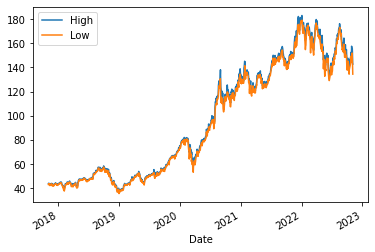

In [12]:
df_aapl[["High", "Low"]].plot()

To further analyse the data, we can try matching up some hypotheses with it. For example, we can hypothesize that Apple stock shoots up around the time they have a large event (usually occuring in March and September). We also need to make the plot human-readable -- this means labelling our axes, maybe putting in a grid, maybe even a title.  

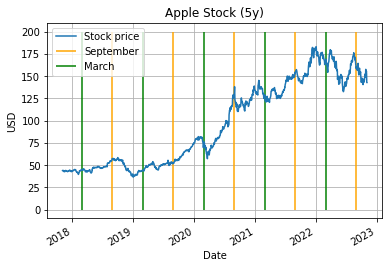

In [13]:
ax = df_aapl[["High"]].plot()  # Create a plot -- this returns an 'axis' object, i.e. the plot itself (not exactly, but will do for now)

# Plot lines whenever June 1st or September 1st occurs
import datetime # needed to create date objects
for year in range(2018, 2023):
    ax.vlines(datetime.date(year, 9, 1), 0, 200, color="orange") # place a vertical line at 01/09/{year} from y=0 to y=200
    ax.vlines(datetime.date(year, 3, 1), 0, 200, color="green")  # place a vertical line at 01/03/{year} from y=0 to y=200

# Make the graph human-readable
ax.set_ylabel("USD")                                # label y-axis
ax.set_title("Apple Stock (5y)")                    # title plot
ax.legend(["Stock price", "September", "March"])    # add a legend: what do these colored lines mean?
ax.grid()                                           # add a grid: how can I compare values more easily?

plt.show() # show the plot on screen

---
# Functions for multiple DFs

What if we want to examine multiple stocks? In this case, we can copy and paste code multiple times, but this is not very clean, and will make it hard to debug your code if something goes wrong. Instead, we can organize the code into _functions_. 

Here, we define two functions:
- `download_ticker_data`: Download ticker data and save to a file whose name is generated in the function itself (for ease of use).
- `load_ticker_data`: Load already downloaded files, and pre-process them so that they are ready to use.

In [14]:
def download_ticker_data(ticker, period, interval):
    """ Download and save ticker data """
    df = yf.download(
            tickers = ticker,
            period = period,
            interval = interval
          )
    # Create a filename by concatenating ticker, period
    # and interval with an underscore in between each.
    # Also, add a file extention at the end.
    filename = "_".join([ticker, period, interval])+".csv"
    # Save file to disk
    df.to_csv(filename)
    # print statement just to say that everything went as expected
    print("> Saved data to file:", filename, "!")

    return df

def load_ticker_data(filename):
    """ Load ticker data from CSV file already in disk """
    # This code is the exact same that we used earlier when
    # pre-processing the date column in the loaded csv file/df
    df = pd.read_csv(filename)
    
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.set_index(df["Date"])
    df = df.drop(columns=["Date"])
    
    # print statement just to say that everything went as expected
    print("> Loaded file", filename, "!")
    
    return df

Using the above functions, we can easily (down)load any stock we want in the format we want it in.

In [15]:
download_ticker_data("TSLA", "5y", "1d")

[*********************100%***********************]  1 of 1 completed
> Saved data to file: TSLA_5y_1d.csv !


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-06,20.466667,20.500000,19.934000,20.185333,20.185333,97290000
2017-11-07,20.068001,20.433332,20.002001,20.403334,20.403334,79414500
2017-11-08,20.366667,20.459333,20.086666,20.292667,20.292667,70879500
2017-11-09,20.166668,20.297333,19.753332,20.199333,20.199333,81706500
2017-11-10,20.166668,20.557333,20.123333,20.199333,20.199333,69381000
...,...,...,...,...,...,...
2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300


In [16]:
load_ticker_data("TSLA_5y_1d.csv")

> Loaded file TSLA_5y_1d.csv !


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-06,20.466667,20.500000,19.934000,20.185333,20.185333,97290000
2017-11-07,20.068001,20.433332,20.002001,20.403334,20.403334,79414500
2017-11-08,20.366667,20.459333,20.086666,20.292667,20.292667,70879500
2017-11-09,20.166668,20.297333,19.753332,20.199333,20.199333,81706500
2017-11-10,20.166668,20.557333,20.123333,20.199333,20.199333,69381000
...,...,...,...,...,...,...
2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300


Thus, let us load in our two dataframes that we want to analyse (this was done individually before in this notebook, but we are doing it in one cell now for clarity and to show you the power of writing functions, though it is not strictly required).

In [17]:
df_aapl = download_ticker_data("AAPL", "5y", "1d")
df_tsla = download_ticker_data("TSLA", "5y", "1d")

[*********************100%***********************]  1 of 1 completed
> Saved data to file: AAPL_5y_1d.csv !
[*********************100%***********************]  1 of 1 completed
> Saved data to file: TSLA_5y_1d.csv !


---
# Comparing Data

Now that we have our data ready to use, we can compare them. One of the most straightforward things to do first is to visualize the data.

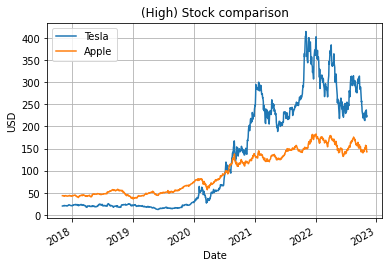

In [18]:
# Basic plots
# We may want to first compare the highs of AAPL and TSLA
stock_ax = df_tsla[["High"]].plot() # Plot AAPL high and store the plot in a variable ax
df_aapl[["High"]].plot(ax=stock_ax) # The ax=ax part just says 'I want this plotted on the same axes/plot as the AAPL one'
stock_ax.legend(["Tesla", "Apple"]) # Add a legend
stock_ax.set_ylabel("USD")          # Add y-axis label
stock_ax.set_title("(High) Stock comparison") # Add title
stock_ax.grid()                     # Add grid
plt.show()

We see that, at least at the time of this notebook's writing, Tesla's stock is more valuable than Apple's. However, we still may not invest in the former -- it seems more volatile and less well-behaved to say that it is a good investment indeed.

Thus, we can analyse the daily returns instead of the raw stocks. Assume we buy stock at the beginning of yesterday, and sell it at the beginning of today. What returns do we expect to get? For this, we can create a new column that takes the difference of the open prices on successive days:

In [19]:
# Calculate returns
df_aapl["Returns"] = 0  # create a new column in df_aapl called Returns and set all values to 0

# iterate over all rows -- note that this is not the usual or best way to iterate
# over a dataframe, but will be clear to you now if you are familiar with for loops.
for idx in range(1,len(df_aapl.index)): # we start at the first and not zeroth row. Why?
    cur_date = df_aapl.index[idx]    # get the current row's date (remember the row's index is a date)
    prev_date = df_aapl.index[idx-1] # get the previous row's date
    cur_price = df_aapl["Open"].loc[cur_date]   # get the current row's open price
    prev_price = df_aapl["Open"].loc[prev_date] # get the previous row's open price
    df_aapl["Returns"].loc[cur_date] = cur_price-prev_price # today's return will be the difference
    # Note that we might get a warning for this last line of code. Why? How do we fix it?
    
# print the dataframe
df_aapl

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2017-11-06,43.092499,43.747501,42.930000,43.562500,41.275192,140105200,0.000000
2017-11-07,43.477501,43.812500,43.400002,43.702499,41.407841,97446000,0.385002
2017-11-08,43.665001,44.060001,43.582500,44.060001,41.746567,97638000,0.187500
2017-11-09,43.777500,44.025002,43.285000,43.970001,41.661297,117930400,0.112499
2017-11-10,43.777500,43.845001,43.567501,43.667500,41.523418,100582000,0.000000
...,...,...,...,...,...,...,...
2022-10-31,153.160004,154.240005,151.919998,153.339996,153.086044,97943200,4.960007
2022-11-01,155.080002,155.449997,149.130005,150.649994,150.400497,80379300,1.919998
2022-11-02,148.949997,152.169998,145.000000,145.029999,144.789810,93604600,-6.130005


Now that we have a dependable algorithm to compute returns, we can write a function to do this to any stock DataFrame we give to it:

In [20]:
def construct_diff_col(df):
    """ Compute returns based on the open prices """
    df["Returns"] = 0
    for idx in range(1,len(df.index)):
        cur_idx = df.index[idx]
        prev_idx = df.index[idx-1]
        cur_price = df["Open"].loc[cur_idx]
        prev_price = df["Open"].loc[prev_idx]
        df["Returns"].loc[cur_idx] = cur_price-prev_price
    
    return df
    
# compute returns for both companies
df_aapl = construct_diff_col(df_aapl)
df_tsla = construct_diff_col(df_tsla)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


We can now vizualise the returns in order to examine any patterns or gather information to create a hypothesis.

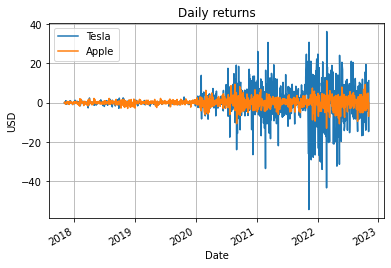

In [21]:
# For each line of this code, ask yourself: 
# 1) What does this line do? 
# 2) Why is this line important?
plt.rcParams["figure.figsize"] = (6,4)

ax = df_tsla[["Returns"]].plot()
df_aapl[["Returns"]].plot(ax=ax)
ax.legend(["Tesla", "Apple"])
ax.set_title("Daily returns")
ax.set_ylabel("USD")
ax.grid()
plt.show()

Interesting! What can we say about these stocks now? What would you invest in just with this information?

---
# Total pipeline + interpretations

We now have all the code we need in order to create a single, streamlined pipeline to arrive at our final returns plot. From start to finish, this is less than 15 lines of code! 

> Loaded file AAPL_5y_1d.csv !
> Loaded file TSLA_5y_1d.csv !


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


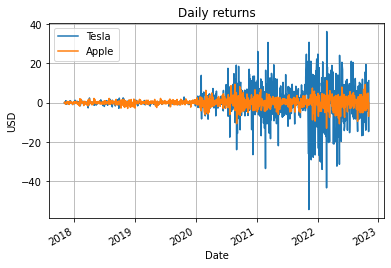

In [22]:
# load data
df_aapl = load_ticker_data("AAPL_5y_1d.csv")
df_tsla = load_ticker_data("TSLA_5y_1d.csv")

# calculate returns
df_aapl = construct_diff_col(df_aapl)
df_tsla = construct_diff_col(df_tsla)

ax = df_tsla[["Returns"]].plot()
df_aapl[["Returns"]].plot(ax=ax)
ax.set_title("Daily returns")
ax.set_ylabel("USD")
ax.legend(["Tesla", "Apple"])
ax.grid()
plt.show()

### Computing volatility

Great! So now, though we saw that the Tesla stock was higher in absolute numbers, it seems like its returns jumps around a lot over time, compared to Apple's returns. This is especially true after about 2020. Thus, we can visually hypothesize that TSLA is more volatile than AAPL.

We can now go one step further: we can mathematically determine the volatility of the stocks' daily returns using the formula (which you can find in textbooks or the internet):

$$\sigma_T=\sigma\sqrt{T}$$

Where $\sigma_T$ is the volatility over time period $T$ (in this case, number of days), and $\sigma$ is the standard deviation of the returns (a measure of the range of data).

We can compute the standard deviation using the inbuilt Pandas DataFrame `std` function. We can compute the standard deviation using the inbuilt `sqrt` function from Python's own `math` library. Isn't it great not having to re-invent the wheel?

 Thus, we get:

In [23]:
import math

std_aapl = df_aapl["Returns"].std()
std_tsla = df_tsla["Returns"].std()
n_days = len(df_aapl)

vol_aapl = std_aapl*math.sqrt(n_days)
vol_tsla = std_tsla*math.sqrt(n_days)

print("Volatility of Apple Inc:", vol_aapl)
print("Volatility of Tesla Inc:", vol_tsla)
print("Ratio (Tesla/Apple):", vol_tsla/vol_aapl)

Volatility of Apple Inc: 78.52049621859351
Volatility of Tesla Inc: 254.82913508372695
Ratio (Tesla/Apple): 3.24538365593497


Thus, we find that the find that the volatility of Tesla stock is about 3.26 times that of Apple's! So, what would _you_ invest in now?

---
# Part 2: Data exploration!

First, we need to download the data (like last week) and take a look at 

In [36]:
# load data
df_aapl = load_ticker_data("AAPL_5y_1d.csv")
df_tsla = load_ticker_data("TSLA_5y_1d.csv")

> Loaded file AAPL_5y_1d.csv !
> Loaded file TSLA_5y_1d.csv !


In [37]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-06,43.092499,43.747501,42.930000,43.562500,41.275192,140105200
2017-11-07,43.477501,43.812500,43.400002,43.702499,41.407841,97446000
2017-11-08,43.665001,44.060001,43.582500,44.060001,41.746567,97638000
2017-11-09,43.777500,44.025002,43.285000,43.970001,41.661297,117930400
2017-11-10,43.777500,43.845001,43.567501,43.667500,41.523418,100582000


In [39]:
df_aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,95.045260,96.189726,93.957123,95.116356,93.774740,1.176756e+08
std,46.546921,47.149309,45.938382,46.561745,46.915444,5.477963e+07
min,35.994999,36.430000,35.500000,35.547501,34.309578,4.100000e+07
25%,49.621248,49.966251,49.068750,49.628750,48.201622,8.155695e+07
50%,79.665001,80.587502,79.125000,79.750000,78.342072,1.034932e+08
75%,140.614998,142.849998,138.245003,140.865005,140.140068,1.374928e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,4.265100e+08


In [41]:
df_aapl.shape

(1259, 6)

In [43]:
df_aapl.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [44]:
df_aapl.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [104]:
df_aapl.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Returns      0
dtype: int64

In [66]:
# calculate returns
def construct_diff_col(df):
    """ Compute returns based on the open prices """
    df["Returns"] = 0
    for idx in range(1,len(df.index)):
        cur_idx = df.index[idx]
        prev_idx = df.index[idx-1]
        cur_price = df["Open"].loc[cur_idx]
        prev_price = df["Open"].loc[prev_idx]
        df["Returns"].loc[cur_idx] = cur_price-prev_price
    
    return df

df_aapl = construct_diff_col(df_aapl)
df_tsla = construct_diff_col(df_tsla)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


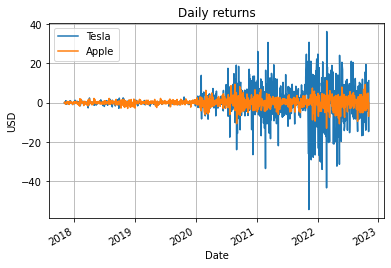

In [67]:
ax = df_tsla[["Returns"]].plot()
df_aapl[["Returns"]].plot(ax=ax)
ax.set_title("Daily returns")
ax.set_ylabel("USD")
ax.legend(["Tesla", "Apple"])
ax.grid()
plt.show()

In [71]:
print(df_tsla["Returns"].mean())
print(df_aapl["Returns"].mean())

0.16055070605895364

---

(array([  1.,   0.,   2.,   0.,   2.,   1.,   3.,   6.,  11.,  12.,  20.,
         19.,  30.,  58., 113., 271., 356., 145.,  77.,  46.,  34.,  27.,
         10.,   4.,   4.,   2.,   2.,   2.,   0.,   1.]),
 array([-12.95999146, -12.15265859, -11.34532572, -10.53799286,
         -9.73065999,  -8.92332713,  -8.11599426,  -7.3086614 ,
         -6.50132853,  -5.69399567,  -4.8866628 ,  -4.07932994,
         -3.27199707,  -2.4646642 ,  -1.65733134,  -0.84999847,
         -0.04266561,   0.76466726,   1.57200012,   2.37933299,
          3.18666585,   3.99399872,   4.80133158,   5.60866445,
          6.41599731,   7.22333018,   8.03066305,   8.83799591,
          9.64532878,  10.45266164,  11.25999451]),
 <a list of 30 Patch objects>)

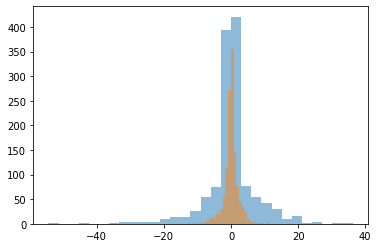

In [70]:
plt.hist(df_tsla["Returns"], bins=30, alpha=0.5)
plt.hist(df_aapl["Returns"], bins=30, alpha=0.5)

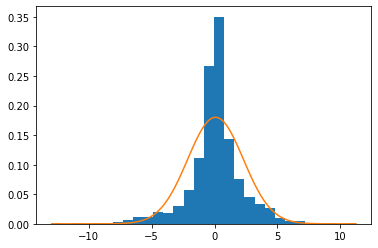

In [87]:
import numpy as np
import scipy.stats as stats

new_df = df_aapl.loc[(5>df_aapl["Returns"]) & (df_aapl["Returns"]>-5)]

new_df = df_aapl
m = new_df["Returns"].mean()
s = new_df["Returns"].std()

x = np.linspace(new_df["Returns"].min(), new_df["Returns"].max(), 100)
y = stats.norm.pdf(x,m,s)
plt.hist(new_df["Returns"], bins=30, density=True)
plt.plot(x,y)
plt.show()

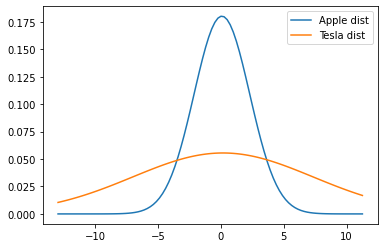

In [90]:
m_a = df_aapl["Returns"].mean()
s_a = df_aapl["Returns"].std()

m_t = df_tsla["Returns"].mean()
s_t = df_tsla["Returns"].std()

x = np.linspace(new_df["Returns"].min(), new_df["Returns"].max(), 100)
y_a = stats.norm.pdf(x,m_a,s_a)
y_t = stats.norm.pdf(x,m_t,s_t)

plt.plot(x,y_a, label="Apple dist")
plt.plot(x,y_t, label="Tesla dist")

plt.legend()
plt.show()

In [93]:
stats.ttest_ind(df_tsla["Returns"], df_aapl["Returns"])

Ttest_indResult(statistic=0.38678049500055184, pvalue=0.698951427573608)

<BarContainer object of 1 artists>

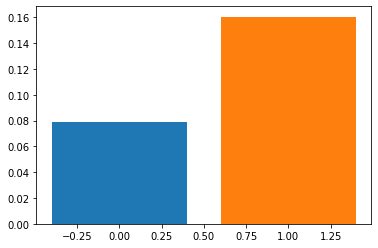

In [101]:
plt.bar(0, m_a)
plt.bar(1, m_t)
# plt.errorbar(0, m_a, s_a)
# plt.errorbar(1, m_t, s_t)